In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [2]:
titanic=pd.read_csv("train.csv")
titanic.shape

(891, 12)

In [3]:
titanic.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.000,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S
426,427,1,2,"Clarke, Mrs. Charles V (Ada Maria Winfield)",female,28.0,1,0,2003,26.000,NaN,S


In [4]:
X=titanic[['Age','Fare']]
Y=titanic['Survived']

In [5]:
X.isnull().mean()*100

Age     19.86532
Fare     0.00000
dtype: float64

In [6]:
X['Age'].fillna(X['Age'].median(),inplace=True)

C:\Users\khadk\AppData\Local\Temp\ipykernel_17740\1049805534.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Age'].fillna(X['Age'].median(),inplace=True)
C:\Users\khadk\AppData\Local\Temp\ipykernel_17740\1049805534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].fillna(X['Age'].median(),inplace=True)


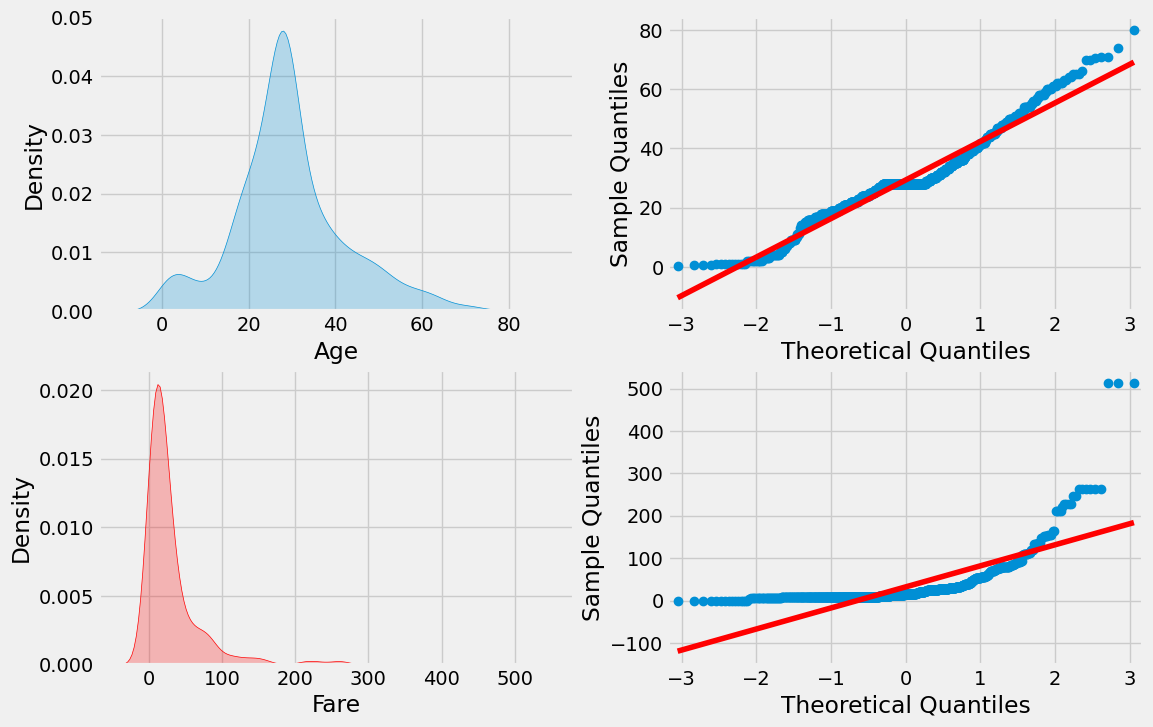

In [7]:
import statsmodels.api as sm

fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(12,8))

sns.kdeplot(data=X,x='Age',fill=True,ax=ax[0,0])
sm.qqplot(X['Age'],ax=ax[0,1],line='s')

sns.kdeplot(data=X,x='Fare',fill=True,ax=ax[1,0],color='red')
sm.qqplot(X['Fare'],ax=ax[1,1],line='s')

plt.show()

In [8]:
print(f"The skweness is Age feature is:{round(X['Age'].skew(),2)}")
print(f"The skweness is Fare feature is:{round(X['Fare'].skew(),2)}")

The skweness is Age feature is:0.51
The skweness is Fare feature is:4.79


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

### Accuracy without mathematical transformation:

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

lr=LogisticRegression()
dtc=DecisionTreeClassifier()

In [11]:
from sklearn.metrics import accuracy_score

lr.fit(X_train,Y_train)
y_pred1=lr.predict(X_test)
print(f"The accuracy for Linear Regression is:{accuracy_score(y_pred1,Y_test)}")

dtc.fit(X_train,Y_train)
y_pred2=dtc.predict(X_test)
print(f"The accuracy for Decison Tree is:{accuracy_score(y_pred2,Y_test)}")

The accuracy for Linear Regression is:0.7430167597765364
The accuracy for Decison Tree is:0.6256983240223464


In [12]:
from sklearn.model_selection import cross_val_score

lr_scores = cross_val_score(lr, X_train, Y_train, cv=5, scoring='accuracy')
print(f"Logistic Regression CV accuracy: {lr_scores.mean():.3f} (+/- {lr_scores.std():.3f})")

dtc_scores = cross_val_score(dtc, X_train, Y_train, cv=5, scoring='accuracy')
print(f"Decision Tree CV accuracy: {dtc_scores.mean():.3f} (+/- {dtc_scores.std():.3f})")

Logistic Regression CV accuracy: 0.626 (+/- 0.014)
Decision Tree CV accuracy: 0.670 (+/- 0.029)


In [13]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

transformer=ColumnTransformer(transformers=[('log',FunctionTransformer(func=np.log1p),['Fare'])],
                              remainder='passthrough')

X_train_transformed=transformer.fit_transform(X_train)
X_test_transformed=transformer.transform(X_test)

In [14]:
lr=LogisticRegression()
dtc=DecisionTreeClassifier()

lr.fit(X_train_transformed,Y_train)
y_pred1=lr.predict(X_test_transformed)
print(f"The accuracy for Linear Regression is:{accuracy_score(y_pred1,Y_test)}")

dtc.fit(X_train_transformed,Y_train)
y_pred2=dtc.predict(X_test_transformed)
print(f"The accuracy for Decison Tree is:{accuracy_score(y_pred2,Y_test)}")

The accuracy for Linear Regression is:0.776536312849162
The accuracy for Decison Tree is:0.6312849162011173


In [15]:
from sklearn.model_selection import cross_val_score

lr_scores = cross_val_score(lr, X_train_transformed, Y_train, cv=5, scoring='accuracy')
print(f"Logistic Regression CV accuracy: {lr_scores.mean():.3f} (+/- {lr_scores.std():.3f})")

dtc_scores = cross_val_score(dtc, X_train_transformed, Y_train, cv=5, scoring='accuracy')
print(f"Decision Tree CV accuracy: {dtc_scores.mean():.3f} (+/- {dtc_scores.std():.3f})")


Logistic Regression CV accuracy: 0.649 (+/- 0.023)
Decision Tree CV accuracy: 0.667 (+/- 0.023)


**Important Points:**
1. Our goal is to try to make the distribution of a skewed feature, normally distributed. We can use mathematical functions like log transformation for right-skewed data and square tranformation for left-skewed data.
2. Here, we can see that such mathematical transformation improves the accuracy of linear model as they perform well with normally distributed data as assume normality in the features, but it does not affect non-pararmetric ML algo like decision trees as they do not assume any distribution.